In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
from tabulate import tabulate


In [5]:
# get kaggle key
os.environ['KAGGLE_CONFIG_DIR'] = os.path.join(os.getcwd())

In [7]:
# downloading kaggle datasets and save them in data directory
!kaggle datasets download -d marcodena/mobile-phone-activity -p ./data

Dataset URL: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity
License(s): DbCL-1.0




  0%|          | 0.00/242M [00:00<?, ?B/s]
  0%|          | 1.00M/242M [00:01<06:04, 692kB/s]
  1%|          | 2.00M/242M [00:01<03:00, 1.39MB/s]
  1%|          | 3.00M/242M [00:01<01:56, 2.15MB/s]
  2%|▏         | 4.00M/242M [00:02<01:25, 2.90MB/s]
  2%|▏         | 5.00M/242M [00:02<01:09, 3.59MB/s]
  2%|▏         | 6.00M/242M [00:02<00:59, 4.13MB/s]
  3%|▎         | 7.00M/242M [00:02<00:53, 4.64MB/s]
  3%|▎         | 8.00M/242M [00:02<00:48, 5.05MB/s]
  4%|▎         | 9.00M/242M [00:02<00:45, 5.36MB/s]
  4%|▍         | 10.0M/242M [00:03<00:44, 5.50MB/s]
  5%|▍         | 11.0M/242M [00:03<00:43, 5.57MB/s]
  5%|▍         | 12.0M/242M [00:03<00:43, 5.49MB/s]
  5%|▌         | 13.0M/242M [00:03<00:44, 5.40MB/s]
  6%|▌         | 14.0M/242M [00:03<00:42, 5.63MB/s]
  6%|▌         | 15.0M/242M [00:04<00:40, 5.81MB/s]
  7%|▋         | 16.0M/242M [00:04<00:40, 5.86MB/s]
  7%|▋         | 17.0M/242M [00:04<00:39, 5.98MB/s]
  7%|▋         | 18.0M/242M [00:04<00:38, 6.06MB/s]
  8%|▊         | 19.0

In [17]:
# unizziping the data
zip_path = './data/mobile-phone-activity.zip'
extract_to = './data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)


In [2]:
# loading required files
#loading all 3 active file
cdr_02 = pd.read_csv("data/sms-call-internet-mi-2013-11-02.csv")
cdr_04 = pd.read_csv("data/sms-call-internet-mi-2013-11-04.csv")
cdr_06 = pd.read_csv("data/sms-call-internet-mi-2013-11-06.csv")

In [3]:
# combining all files into a single dataframe
combined_df = pd.concat([cdr_02,cdr_04,cdr_06])
combined_df.shape

(6564031, 8)

#### <center> How many total records across all 3 datasets?

In [4]:
print(f"Recordes in sms-call-internet-mi-2013-11-02 are: {len(cdr_02)}")
print(f"Recordes in sms-call-internet-mi-2013-11-04 are: {len(cdr_04)}")
print(f"Recordes in sms-call-internet-mi-2013-11-06 are: {len(cdr_06)}")
print(f"total records: {len(combined_df)}")

Recordes in sms-call-internet-mi-2013-11-02 are: 1847331
Recordes in sms-call-internet-mi-2013-11-04 are: 2299544
Recordes in sms-call-internet-mi-2013-11-06 are: 2417156
total records: 6564031


##### The total records in all 3 files are 6564031

#### <center> How many unique grid squares (CellID) are there? 

In [5]:
# finding the numbe of unique CellIDs
unique_cellID = combined_df['CellID'].nunique()
print(f"There are {unique_cellID} unique CellIDs")

There are 10000 unique CellIDs


##### There is `10000` unique grids in the dataset

#### <center> How many unique country codes appear in the data?

In [6]:
# finding the numbe of unique Country Codes
unique_country_codes = combined_df['countrycode'].nunique()
print(f"There are {unique_country_codes} unique country codes")

There are 302 unique country codes


##### there is `302`unique country codes in the dataset

#### <center> Are there any missing values?

In [7]:
# counting null values
print("================== Null Values Count by Column =====================\n")
print(combined_df.isna().sum().sort_values(ascending=False).to_frame(name="Missing Values Count"))
print("="*70)

================== Null Values Count by Column =====================

             Missing Values Count
smsout                    5025738
callin                    4761685
smsin                     3964171
callout                   3764484
internet                  3621117
countrycode                     0
datetime                        0
CellID                          0


##### Yes, there are missing values in `smsin`,`smsout`,`callin`,`callout`,and `internet` columns

#### <center> Inputing missing/NaN with the mean of each columns.

In [8]:
# let make a copy of the raw data and start clearning
clean_df = combined_df.copy()

In [9]:
# handling missing values
clean_df['smsout'] = clean_df['smsout'].fillna(clean_df['smsout'].mean())
clean_df['callin'] = clean_df['callin'].fillna(clean_df['callin'].mean())
clean_df['smsin'] = clean_df['smsin'].fillna(clean_df['smsin'].mean())
clean_df['callout'] = clean_df['callout'].fillna(clean_df['callout'].mean())
clean_df['internet'] = clean_df['internet'].fillna(clean_df['internet'].mean())

In [10]:
# counting null values after imputation
print("================== Null Values Count by Column =====================\n")
print(clean_df.isna().sum().sort_values(ascending=False).to_frame(name="Missing Values Count"))
print("="*70)

================== Null Values Count by Column =====================

             Missing Values Count
datetime                        0
CellID                          0
countrycode                     0
smsin                           0
smsout                          0
callin                          0
callout                         0
internet                        0


#### <center> For which columns are missing values most common? 

In [11]:
# finding only columns with missing values
print("================== Columns with Missing Values =====================\n")

missing_counts = combined_df.isna().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

print(missing_counts.to_frame(name="Missing Values Count"))
print("="*70)

================== Columns with Missing Values =====================

          Missing Values Count
smsout                 5025738
callin                 4761685
smsin                  3964171
callout                3764484
internet               3621117


##### Missing values are common in: `smsout`,`callin`,`smsin`,`callout`, and `internet`

#### <center> How many records did you modify?

In [12]:
# finding modifiend records
modified_records = (combined_df != clean_df).any(axis=1)
print(f' Filling missing values with mean in each column, {len(clean_df[modified_records])} records were modified.')


 Filling missing values with mean in each column, 5880441 records were modified.


In [13]:
# Verifying if the number of modified records equals the number of records with missing values
if combined_df.isna().any(axis=1).sum() == len(clean_df[modified_records]):
  print("The number of modified records is equal to the number of recoreds with missing values")
else:
  print("The number of modified records is incorrect")


The number of modified records is equal to the number of recoreds with missing values


##### 5880441 were modified by mean imputation

#### <center> What is the most common peak hour across all grids?

In [14]:
# Adding aggregate columns (total_sms, total_calls, total_internet)
clean_df['total_sms'] = clean_df['smsin'] + clean_df['smsout']
clean_df['total_calls'] = clean_df['callin'] + clean_df['callout']
clean_df['total_internet'] = clean_df['internet']


In [15]:
# adding date and time columns
# converting datetime column to pandas datetime to be able to create data and time from datetime column
clean_df['datetime'] =  pd.to_datetime(clean_df['datetime'])

# creating date and time columns
clean_df['date'] = clean_df['datetime'].dt.date
clean_df['hour'] = clean_df['datetime'].dt.hour

In [16]:
# creating hourly aggregate for calls,sms,and internet
hourly_calls = clean_df.groupby('hour')['total_calls'].sum()
hourly_sms = clean_df.groupby('hour')['total_sms'].sum()
hourly_internet = clean_df.groupby('hour')['total_internet'].sum()

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

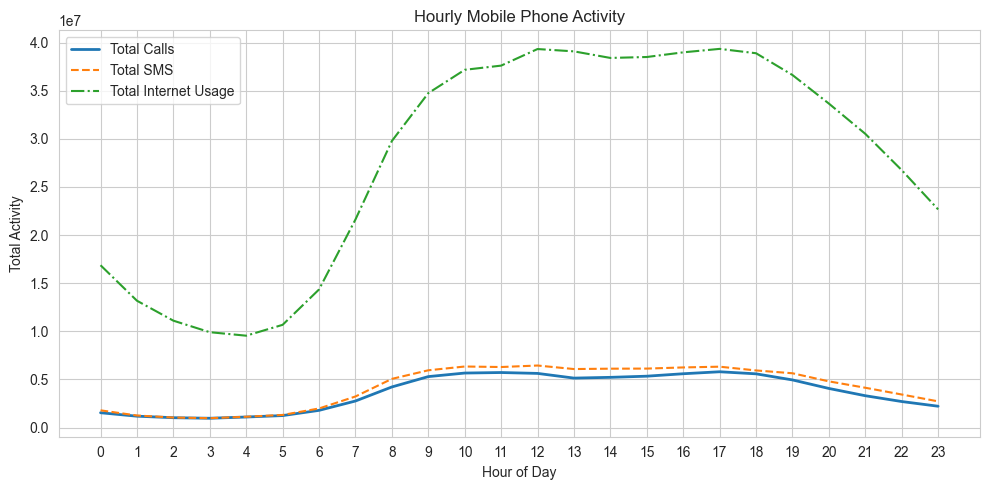

In [18]:
sns.set_style("whitegrid")
palette = sns.color_palette("tab10", 10)
# X-axis (hours)
hours = hourly_calls.index
plt.figure(figsize=(10, 5))
plt.plot(hours, hourly_calls.values,
         label='Total Calls', color=palette[0], linewidth=2)

plt.plot(hours, hourly_sms.values,
         label='Total SMS', color=palette[1], linestyle='--')

plt.plot(hours, hourly_internet.values,
         label='Total Internet Usage', color=palette[2], linestyle='-.')

plt.title("Hourly Mobile Phone Activity")
plt.xlabel("Hour of Day")
plt.ylabel("Total Activity")
plt.legend()
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


##### The above approache does not show pattern at grid level, now let find 

In [19]:

# Creating total activity column 
clean_df['total_activity'] = clean_df['total_calls'] + clean_df['total_sms'] + clean_df['total_internet']

peak_hours_per_grid = clean_df.loc[clean_df.groupby('CellID')['total_activity'].idxmax()]['hour']
peak_hour_counts = peak_hours_per_grid.value_counts().sort_index()
print(f"The most common pick hour accross all grids is: {peak_hour_counts.idxmax()}:00")

The most common pick hour accross all grids is: 18:00


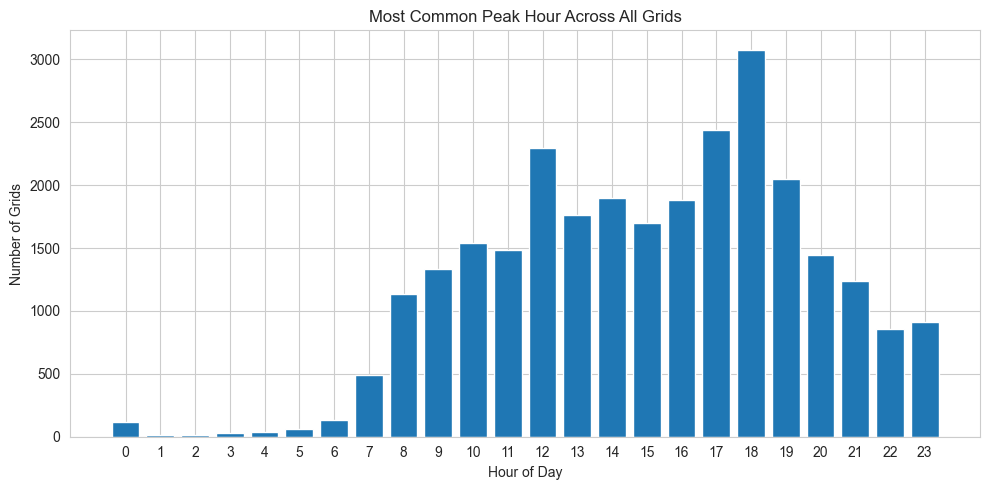

In [20]:
# let visualize it
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
plt.bar(peak_hour_counts.index, peak_hour_counts.values)

plt.title("Most Common Peak Hour Across All Grids")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Grids")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


#### <center> What hour has the lowest activity?

In [21]:
# calculating hourly activity to find lowest
hourly_activity = clean_df.groupby('hour')['total_activity'].sum()
lowest_hour = hourly_activity.idxmin()


print(f"Lowest activity hour: {lowest_hour}:00")

Lowest activity hour: 4:00


##### Hourly activity follows normal daily routines: usage peaks around `18:00` after work hours, while the lowest activity occurs around `4:00`, when most people are inactive or sleep. These results show how communication activity varies throughout the day.

#### <center> Calculate and report: mean, median, std, min, max for total calls by hour

In [22]:
hourly_calls.describe()

count    2.400000e+01
mean     3.671836e+06
std      1.876943e+06
min      9.711108e+05
25%      1.729630e+06
50%      4.145010e+06
75%      5.403121e+06
max      5.801570e+06
Name: total_calls, dtype: float64

##### total calls hourly profile

In [45]:
stats_table = pd.DataFrame({
    'Hour': hourly_calls.index,
    'Mean': hourly_calls.values,
    'Median': clean_df.groupby('hour')['total_calls'].median(),
    'Std': clean_df.groupby('hour')['total_calls'].std(),
    'Min': clean_df.groupby('hour')['total_calls'].min(),
    'Max': clean_df.groupby('hour')['total_calls'].max()
})

print(tabulate(stats_table, headers='keys', tablefmt='grid', floatfmt='.2f', showindex=False))

+--------+------------+----------+-------+-------+---------+
|   Hour |       Mean |   Median |   Std |   Min |     Max |
+========+============+==========+=======+=======+=========+
|   0.00 | 1544151.47 |    13.43 |  5.28 |  0.00 |  223.49 |
+--------+------------+----------+-------+-------+---------+
|   1.00 | 1185631.04 |    13.43 |  5.13 |  0.00 |  141.98 |
+--------+------------+----------+-------+-------+---------+
|   2.00 | 1028139.79 |    13.43 |  5.33 |  0.00 |  210.97 |
+--------+------------+----------+-------+-------+---------+
|   3.00 |  971110.83 |    13.43 |  5.65 |  0.00 |  298.35 |
+--------+------------+----------+-------+-------+---------+
|   4.00 | 1100272.67 |    13.43 |  5.29 |  0.00 |  255.06 |
+--------+------------+----------+-------+-------+---------+
|   5.00 | 1248683.07 |    13.43 |  5.40 |  0.00 |  177.17 |
+--------+------------+----------+-------+-------+---------+
|   6.00 | 1791455.91 |    13.43 |  4.97 |  0.00 |  201.35 |
+--------+------------+-

In [23]:
total_calls_statistics = pd.DataFrame({
    "Total Calls Statistics": ["Mean", "Median","std","Min", "Max"],
    "Value": [
        hourly_calls.mean(),
        hourly_calls.median(),
        hourly_calls.std(),
        hourly_calls.min(),
        hourly_calls.max()
    ]
})

total_calls_statistics


,Total Calls Statistics,Value
0,Mean,3.671836e+06
1,Median,4.145010e+06
2,std,1.876943e+06
3,Min,9.711108e+05
4,Max,5.801570e+06


In [24]:
hourly_calls.mean()

np.float64(3671836.305684332)

#### <center>What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)?

In [25]:
# variables to hold day/night hours
day_hours = list(range(6, 21))
night_hours = list(range(0,6)) + list(range(21,24))

In [26]:
print(f'Daytime: {day_hours}')
print(f'Nighttime: {night_hours}')

Daytime: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Nighttime: [0, 1, 2, 3, 4, 5, 21, 22, 23]


In [27]:
# day/night activitie
day_activity = clean_df.loc[clean_df['hour'].isin(day_hours), 'total_activity'].sum()
night_activity = clean_df.loc[clean_df['hour'].isin(night_hours), 'total_activity'].sum()

day_night_activities = day_activity + night_activity

print(f"Daytime (6am-8pm): {day_activity/day_night_activities*100:.2f}%")
print(f"Nighttime (8pm-6am): {night_activity/day_night_activities*100:.2f}%")

Daytime (6am-8pm): 78.51%
Nighttime (8pm-6am): 21.49%


#### <center> Do international calls happen at different times than domestic? (compare hourly patterns) 

In [29]:
# creating a column to classify a call as domestic/international
# domestic calls has country code 39 for italy 
clean_df['call_class'] = np.where(clean_df['countrycode'] == 39, "Domestic", "International")

hourly_calls_class = clean_df.groupby(['hour','call_class'])['total_calls'].sum().unstack()

hourly_calls_class


call_class,Domestic,International
hour,,
0,1.400787e+05,1.404073e+06
1,9.761930e+04,1.088012e+06
2,1.161369e+05,9.120028e+05
3,1.307244e+05,8.403865e+05
4,1.293069e+05,9.709658e+05
5,9.228045e+04,1.156403e+06
6,1.175235e+05,1.673932e+06
7,4.414562e+05,2.321321e+06
8,1.222819e+06,2.999635e+06


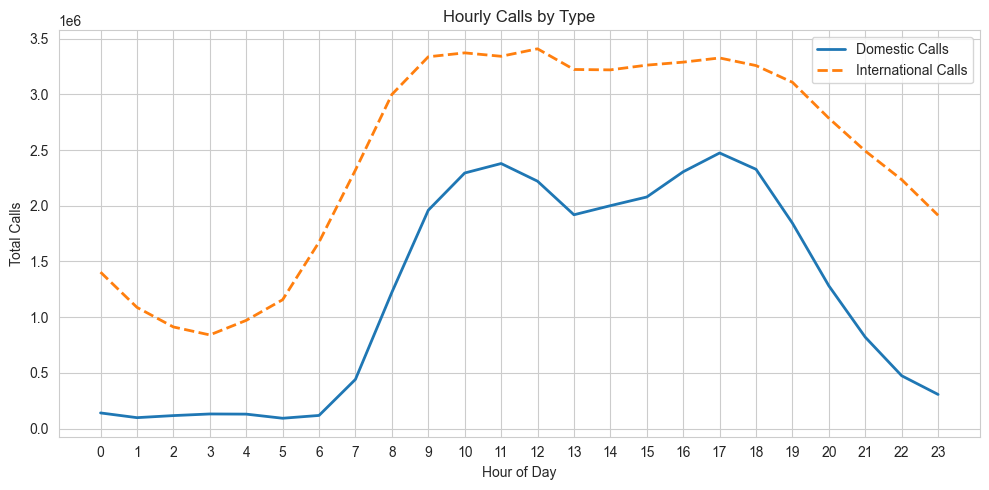

In [30]:

sns.set_style("whitegrid")
palette = sns.color_palette("tab10", 10)
hours = hourly_calls_class.index

plt.figure(figsize=(10, 5))

# Plot Domestic calls
plt.plot(hours, hourly_calls_class['Domestic'],
         label='Domestic Calls', color=palette[0], linewidth=2)

# Plot International calls
plt.plot(hours, hourly_calls_class['International'],
         label='International Calls', color=palette[1], linestyle='--', linewidth=2)

plt.title("Hourly Calls by Type")
plt.xlabel("Hour of Day")
plt.ylabel("Total Calls")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()


domestinc and international calls follows the same hourly pattern, the different is the valume, international calls appers to dominate local calls.

#### <center> Use numpy to perform statistical comparisons between different conditions, Compare:

##### <center> Domestic (Italy) vs International calls.
##### <center>What percentage of calls are international vs domestic? 

In [31]:
total_calls = np.sum(clean_df['total_calls'])
international_calls = np.sum(clean_df.loc[clean_df['call_class']=="International", 'total_calls'])
domestic_calls = np.sum(clean_df.loc[clean_df['call_class']=="Domestic", 'total_calls'])

print(f"Domestic calls: {np.divide(domestic_calls,total_calls)*100:.2f}%")
print(f"International calls: {np.divide(international_calls,total_calls)*100:.2f}%")



Domestic calls: 33.11%
International calls: 66.89%


##### analysis shows that 33.11% of calls are domestic, while 66.89% are international, <br> indicating that international communication dominates the total call volume.

##### <center> What percentage of SMS are international vs domestic?

In [32]:

total_sms = np.sum(clean_df['total_sms'])
international_sms = np.sum(clean_df.loc[clean_df['call_class']=="International", 'total_sms'])
domestic_sms = np.sum(clean_df.loc[clean_df['call_class']=="Domestic", 'total_sms'])

print(f"Domestic SMS: {np.divide(domestic_sms,total_sms)*100:.2f}%")
print(f"International SMS: {np.divide(international_sms,total_sms)*100:.2f}%")

Domestic SMS: 24.98%
International SMS: 75.02%


##### As for the calls, international sms confirms to dominate the domestic sms

##### <center> Are international calls more incoming or outgoing (calculate the ratio)

<center> Incoming Calls to Outgoing calls

In [43]:
international_callin = np.sum(clean_df.loc[clean_df['call_class']=="International", 'callin'])
internationl_callout = np.sum(clean_df.loc[clean_df['call_class']=="International", 'callout'])

ratio_callin_callout =  np.divide(international_callin,internationl_callout)
print(f"International calls incoming to outgoing ratio: {ratio_callin_callout:.2f}")


International calls incoming to outgoing ratio: 1.67


##### the ration of 1.67 tells us that the international calls are more incoming.

##### <center> Is there a correlation between SMS volume and Call volume at the grid level?

In [44]:
grid_activity = clean_df.groupby('CellID')[['total_sms','total_calls']].sum()
# Correlation
corr = np.corrcoef(grid_activity['total_sms'], grid_activity['total_calls'])[0,1]
print(f"Correlation between SMS and Calls at grid level: {corr:.2f}")


Correlation between SMS and Calls at grid level: 0.99


##### The correlation between SMS volume and call volume at the grid level is `0.99`. This indicates a very strong positive relationship between SMS and call activity at grid level.